In [47]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import torch.optim as optim

# Q1)

The parameters are 1.0, and 1.0


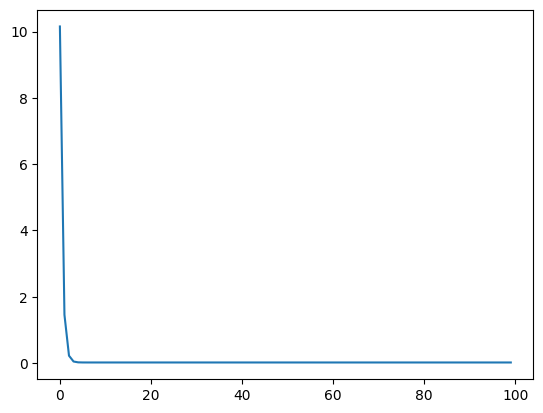

In [28]:
x = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4, 19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2], dtype=torch.float32)
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6, 16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6], dtype=torch.float32)

w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)
print("The parameters are {}, and {}".format(w,b))

learning_rate = torch.tensor(0.001)
loss_list = []
for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        a = w * x[j]
        y_p = a + b
        loss += (y_p - y[j]) ** 2
    loss = loss / len(x)
    loss_list.append(loss.item())
    loss.backward()
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
    w.grad.zero_()
    b.grad.zero_()
plt.plot(loss_list)
plt.show()

# Q2)

The parameters are 1.0, and 1.0


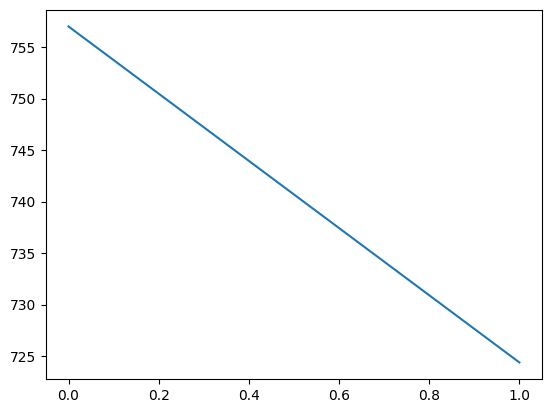

In [41]:
x = torch.tensor([2.0, 4.0], dtype=torch.float32)
y = torch.tensor([20.0, 40.0], dtype=torch.float32)

w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)
print("The parameters are {}, and {}".format(w,b))

learning_rate = torch.tensor(0.001)
loss_list = []
for epochs in range(2):
    loss = 0.0
    for j in range(len(x)):
        a = w * x[j]
        y_p = a + b
        loss += (y_p - y[j]) ** 2
    loss = loss / len(x)
    loss_list.append(loss.item())
    loss.backward()
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
    w.grad.zero_()
    b.grad.zero_()
plt.plot(loss_list)
plt.show()

# Q3)

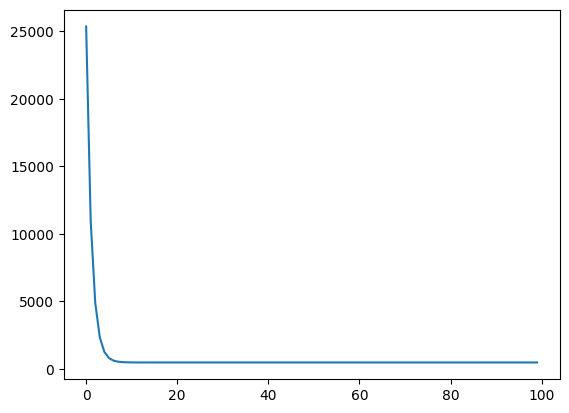

In [65]:
x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0], dtype=torch.float32)
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0], dtype=torch.float32)
learning_rate = torch.tensor(0.001)

class RegressionModel:
    def __init__(self):
        self.w = torch.tensor([1.0], requires_grad=True)
        self.b = torch.tensor([1.0], requires_grad=True)
    def forward(self, x):
        return self.w * x + self.b
    def update(self):
        self.w -= learning_rate * self.w.grad
        self.b -= learning_rate * self.b.grad
    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()
        
def criterion(yj, y_p):
    return (yj - y_p)**2

model = RegressionModel()

loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        y_p = model.forward(x[j])
        loss += criterion(y[j], y_p)
    loss = loss / len(x)
    loss_list.append(loss.item())
    loss.backward()
    with torch.no_grad():
        model.update()
    model.reset_grad()
    #print("Epoch {}: w={}, b={}, loss={}".format(epoch, model.w.item(), model.b.item(), loss.item()))

plt.plot(loss_list)
plt.show()

# Q4)

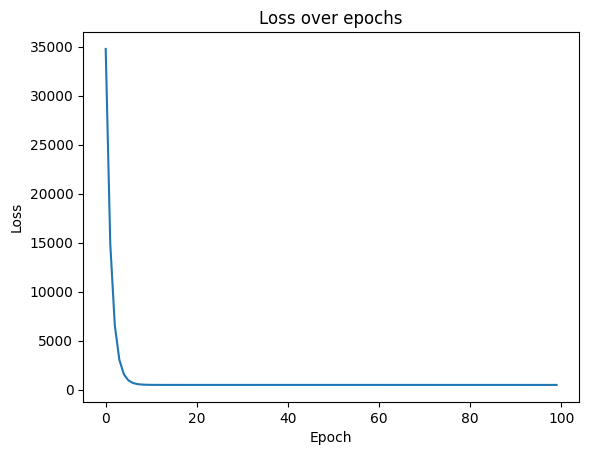

In [63]:
x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0], dtype=torch.float32)
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0], dtype=torch.float32)

class RegressionDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

dataset = RegressionDataset(x.view(-1, 1), y.view(-1, 1))
dataloader = DataLoader(dataset, batch_size=len(dataset), shuffle=True)

model = RegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

loss_list = []

for epoch in range(100):
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    loss_list.append(loss.item())
    #print("Epoch {}: Average Loss: {:.4f}".format(epoch, avg_loss))

plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.show()


# Q5)

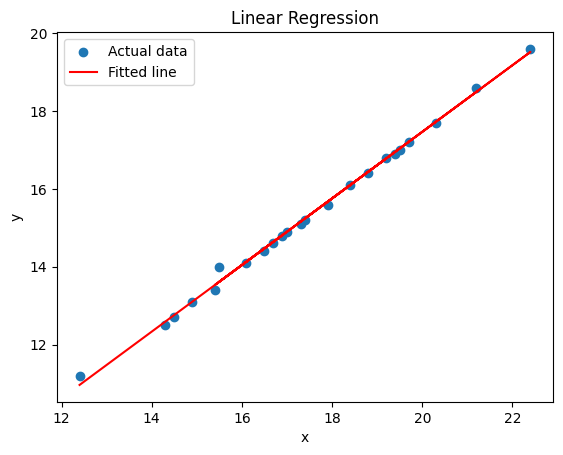

In [66]:
x = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4, 19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2], dtype=torch.float32).view(-1, 1)
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6, 16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6], dtype=torch.float32).view(-1, 1)

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = RegressionModel()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

num_epochs = 100
loss_list = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

plt.scatter(x, y, label='Actual data')
plt.plot(x, model(x).detach().numpy(), color='red', label='Fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Q6)

Epoch [1000/1000], Loss: 0.4356
Prediction for X1=3, X2=2: 5.428155899047852


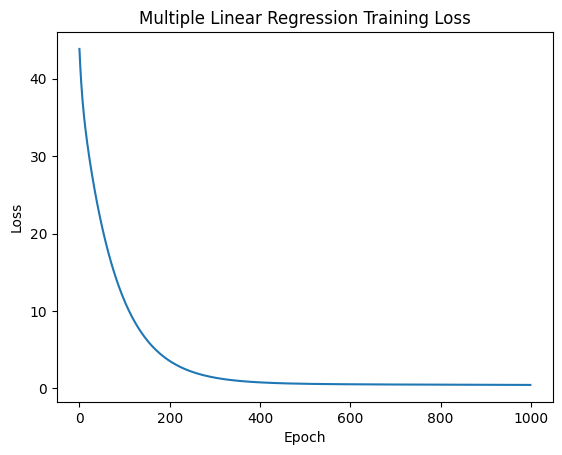

In [69]:
X1 = torch.tensor([3, 4, 5, 6, 2], dtype=torch.float32).view(-1, 1)
X2 = torch.tensor([8, 5, 7, 3, 1], dtype=torch.float32).view(-1, 1)
Y = torch.tensor([-3.7, 3.5, 2.5, 11.5, 5.7], dtype=torch.float32).view(-1, 1)

X = torch.cat([X1, X2], dim=1)

class MultipleRegressionModel(nn.Module):
    def __init__(self):
        super(MultipleRegressionModel, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return self.linear(x)

model = MultipleRegressionModel()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

num_epochs = 1000
loss_list = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = criterion(y_pred, Y)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

new_data_point = torch.tensor([[3, 2]], dtype=torch.float32)
predicted_y = model(new_data_point)
print("Prediction for X1=3, X2=2:", predicted_y.item())

import matplotlib.pyplot as plt

plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Multiple Linear Regression Training Loss')
plt.show()

# Q7)

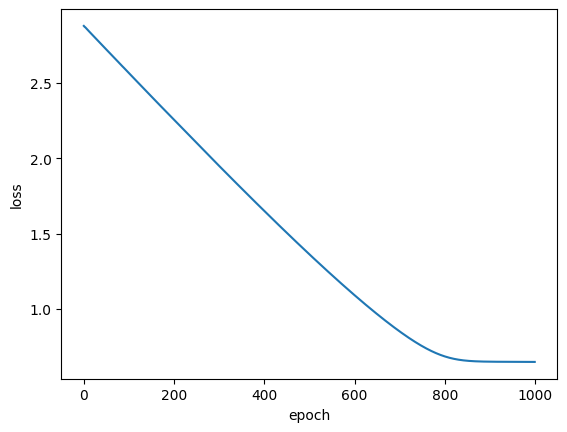

In [73]:
x = torch.tensor([1, 5, 10, 10, 25, 50, 70, 75, 100], dtype=torch.float32)
y = torch.tensor([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=torch.float32)

w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)
alpha = torch.tensor(0.0001)
epochs = 1000
cost = []

criterion = nn.BCELoss()

for epoch in range(epochs):
    y_pred = torch.sigmoid(x * w + b)
    
    # Calculate Binary Cross Entropy Loss
    loss = criterion(y_pred, y)
    cost.append(loss.item())
    
    loss.backward()
    with torch.no_grad():
        w -= alpha * w.grad
        b -= alpha * b.grad

    w.grad.zero_()
    b.grad.zero_()

plt.plot([i for i in range(len(cost))], cost)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()